In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

def init_ann(input_size, hidden_size, output_size):
    network = {
        "W1": np.random.randn(input_size, hidden_size),
        "W2": np.random.randn(hidden_size, output_size),
        "b1": np.zeros((1, hidden_size)),
        "b2": np.zeros((1, output_size))
    }
    return network

# activation function for hidden layer
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# activation function for output layer
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=1, keepdims=True)

In [ ]:
def cross_entropy_error(y_true, y_pred): # error function to test loss at each epoch
    delta = 1e-7
    loss = -np.mean(y_true * np.log(y_pred + delta))
    return loss

def train_network(network, X_train, y_train, epochs, learning_rate):
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(X_train.shape[0]):
            #Forward pass
            a1 = np.dot(X_train[i], network['W1']) + network['b1']
            z1 = sigmoid(a1)  # Calculate the activations using sigmoid activation function (hidden layer)
            a2 = np.dot(z1, network['W2']) + network['b2']
            y_pred = softmax(a2)  # Activations for the output layer

            error = y_pred - np.eye(10)[y_train[i]]
            loss = cross_entropy_error(np.eye(10)[y_train[i]], y_pred)
            epoch_loss += loss

            # Back propagation to minimize error
            dW2 = np.outer(z1, error)
            db2 = error
            dz1 = np.dot(error, network['W2'].T) * z1 * (1 - z1)
            dW1 = np.outer(X_train[i], dz1)
            db1 = dz1

            network['W1'] -= learning_rate * dW1
            network['W2'] -= learning_rate * dW2
            network['b1'] -= learning_rate * db1
            network['b2'] -= learning_rate * db2

        print(f"Epoch {epoch}, Loss: {epoch_loss / X_train.shape[0]}")

def predict(network, x):
    W1, W2, b1, b2 = network['W1'], network['W2'], network['b1'], network['b2']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    return softmax(a2)

Epoch 0, Loss: 0.18095840351894305
Epoch 1, Loss: 0.07592223490064437
Epoch 2, Loss: 0.059718096571087786
Epoch 3, Loss: 0.05155067438000224
Epoch 4, Loss: 0.046316688607852013
Epoch 5, Loss: 0.04255875727939432
Epoch 6, Loss: 0.03967610262110157


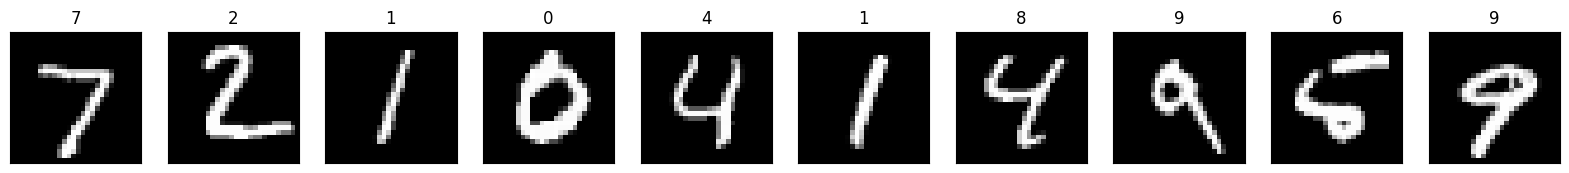

Accuracy: 88.66000000000001 %


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

network = init_ann(784, 128, 10) # 784 pixels for every node in input layer, 128 in hidden layer and 10 for output layer
train_network (network, X_train, y_train, epochs = 7, learning_rate=0.001)

predictions = np.argmax(predict(network, X_test), axis=1)

fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

print("Accuracy:", (accuracy_score(y_test, predictions)) * 100, "%")

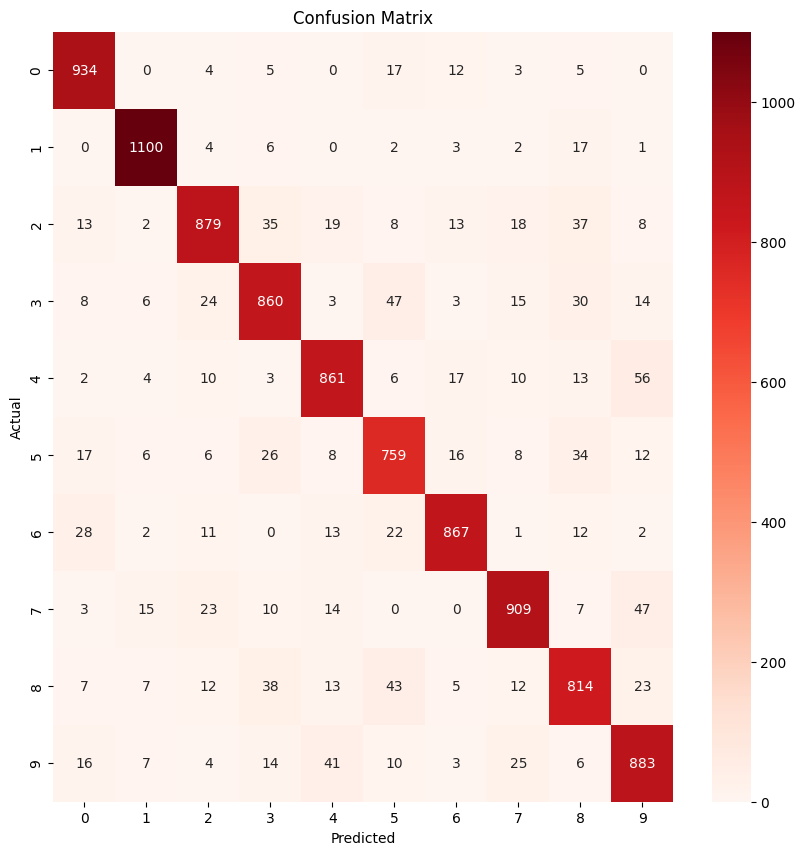

In [ ]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Reds', xticklabels = np.arange(10), yticklabels = np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()